In [1]:
# to read and wrangle data
import pandas as pd

# to import data from LA Data portal
from sodapy import Socrata

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
flood = gpd.read_file('data/100 year Floodplain.geojson')
hurricane = gpd.read_file('data/Hurricane Inundation Zones - Worst Case.geojson')

In [3]:
flood.shape

(5982, 11)

In [4]:
flood.head()

,fld_zone,shape_area,join_count,gridcode,shape_leng,static_bfe,id,orig_fid,abfe_0_2pc,target_fid,geometry
0,,0.0,0,900,0.0,0.0,2,0,0,0,"MULTIPOLYGON (((-73.91020 40.91784, -73.91020 ..."
1,,0.0,0,900,0.0,0.0,4,1,0,0,"MULTIPOLYGON (((-73.90993 40.91544, -73.91016 ..."
2,,0.0,0,900,0.0,0.0,5,2,0,0,"MULTIPOLYGON (((-73.91147 40.91345, -73.91147 ..."
3,,0.0,0,1200,0.0,0.0,6,3,0,0,"MULTIPOLYGON (((-73.91165 40.91283, -73.91875 ..."
4,,0.0,0,1200,0.0,0.0,7,4,0,0,"MULTIPOLYGON (((-73.91129 40.91256, -73.91165 ..."


In [5]:
flood.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5982 entries, 0 to 5981
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   fld_zone    5982 non-null   object  
 1   shape_area  5982 non-null   object  
 2   join_count  5982 non-null   object  
 3   gridcode    5982 non-null   object  
 4   shape_leng  5982 non-null   object  
 5   static_bfe  5982 non-null   object  
 6   id          5982 non-null   object  
 7   orig_fid    5982 non-null   object  
 8   abfe_0_2pc  5982 non-null   object  
 9   target_fid  5982 non-null   object  
 10  geometry    5982 non-null   geometry
dtypes: geometry(1), object(10)
memory usage: 514.2+ KB


<AxesSubplot:>

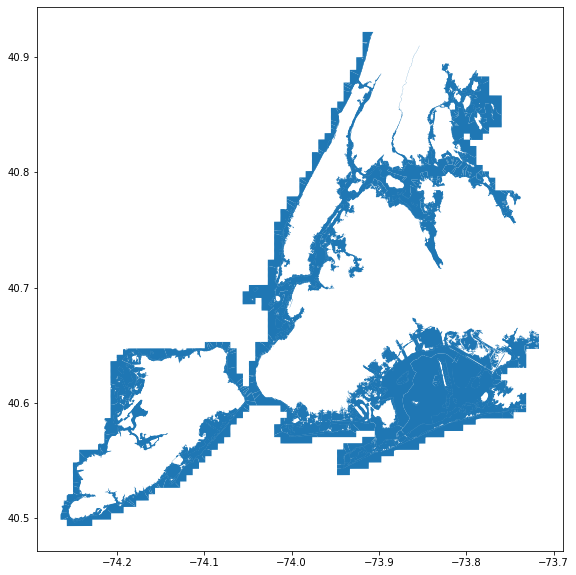

In [6]:
flood.plot(figsize=(10,10))

In [7]:
flood = flood.to_crs(epsg=3857)

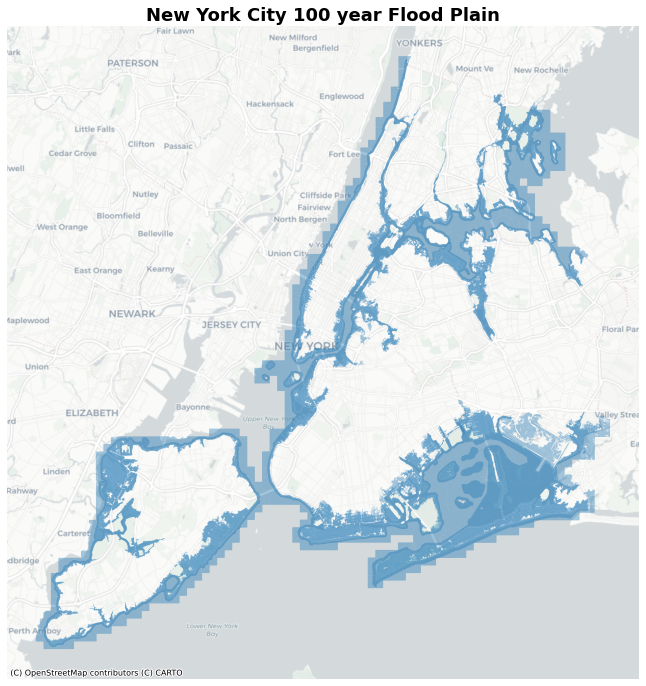

In [8]:
fig, ax = plt.subplots(figsize=(12,12))

flood.plot(ax=ax,
         lw=0.5,
         alpha=0.4)
ax.set_title("New York City 100 year Flood Plain", weight='bold', size=18)
# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

fig.show()

<AxesSubplot:>

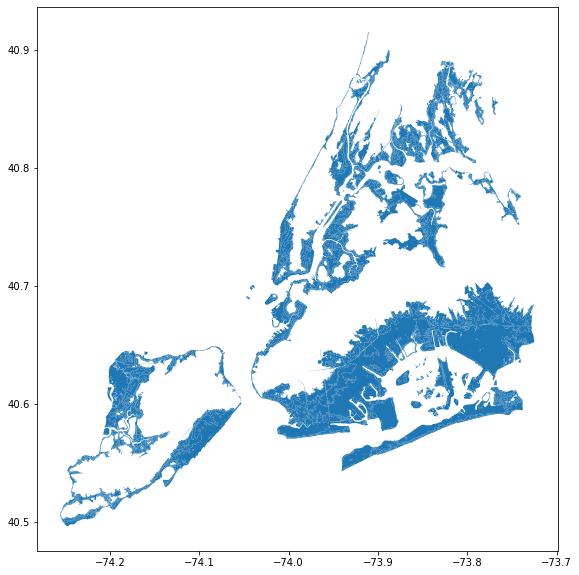

In [10]:
hurricane.plot(figsize=(10,10))

In [11]:
hurricane.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   shape_area  24 non-null     object  
 1   objectid    24 non-null     object  
 2   shape_leng  24 non-null     object  
 3   category    24 non-null     object  
 4   borocode    24 non-null     object  
 5   geometry    24 non-null     geometry
dtypes: geometry(1), object(5)
memory usage: 1.2+ KB


In [12]:
hurricane = hurricane.to_crs(epsg=3857)

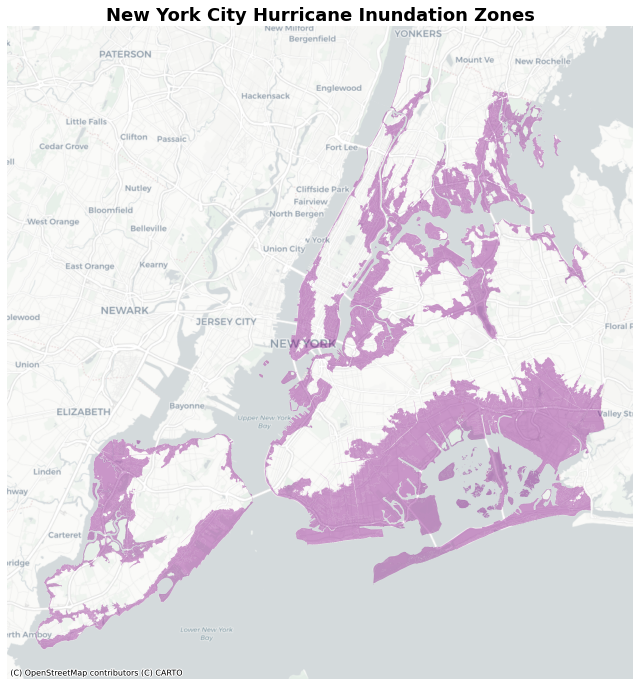

In [15]:
fig, ax = plt.subplots(figsize=(12,12))

hurricane.plot(ax=ax, color='purple',
         lw=0.5,
         alpha=0.4)
ax.set_title("New York City Hurricane Inundation Zones", weight='bold', size=18)
# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

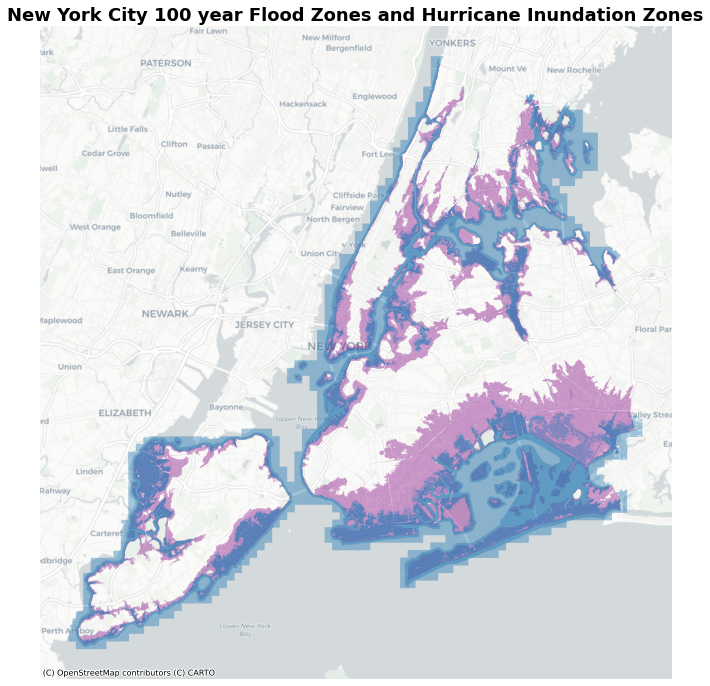

In [16]:
fig, ax = plt.subplots(figsize=(12,12))

hurricane.plot(ax=ax,color='purple',
         lw=0.5,
         alpha=0.4)
flood.plot(ax=ax,
         lw=0.5,
         alpha=0.4)
ax.set_title("New York City 100 year Flood Zones and Hurricane Inundation Zones", weight='bold', size=18)
# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)